In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopy

In [12]:
# converts a raw data file, test flag takes a small subset of the first file (the first threshold rows)
def convertToJson(inputFile, outputFile, test=False, threshold=1000):
    
    # read lines into memory
    with open(inputFile, 'r') as inFile:
        count = 0
        lines = []
        for line in inFile:
            lines.append(line)
            count +=1
            if count > threshold and test:
                break
        print(count)

    # write lines out to json file, last line needs to not have comma otherwise pandas throws error
    with open(outputFile, 'w') as outFile:
        outFile.write('[\n')
        k = len(lines)
        for i, line in enumerate(lines[:-1]):
            res = line.replace('}','},')
            outFile.write(res)
        outFile.write(lines[-1])
        outFile.write(']\n')


In [13]:
# creates a data frame given json file jsonData
def createDataFrame(jsonData):
    df = None
    with open(jsonData,'r') as data:
        df = pd.read_json(data)
    return df


In [14]:
fileName1 = 'rio_bq_2019000000000000'
outputFileName1 = fileName1+'.json'
df1 = convertToJson(fileName1, outputFileName1, test=True, threshold=10000)
                
fileName2 = 'rio_bq_2019000000000001'
outputFileName2 = fileName2+'.json'
df2 = convertToJson(fileName2, outputFileName2, test=True, threshold=10000)
                
df1 = createDataFrame(outputFileName1)
df2 = createDataFrame(outputFileName2)

frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)

10001
10001


In [15]:
def convertDateTime(df):
    df['localtime'] = pd.to_datetime(df['localtime'])
    return df

df = convertDateTime(df)


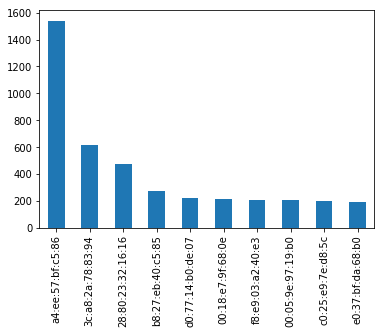

In [9]:
# fig, ax = plt.subplots()
# top100 = df['ClientMacAddr'].value_counts()[:10]
# top100.plot.bar(ax=ax)

In [10]:
# addrs = df['ClientMacAddr'].value_counts()[:10].to_dict()
# addrList = []
# for addr in addrs:
#     addrList.append(addr)

In [16]:
from datetime import timedelta

def createInitialAddresses(df, startTime):
    endTime = startTime + timedelta(hours=1)
    timeFrame = df[(df['localtime'] >= startTime) & (df['localtime'] < endTime)]
    addrCounts = df['ClientMacAddr'].value_counts()[:20].to_dict()
    return list(addrCounts.keys())

def knnGroupSoloClassifier(df, addrList,starTime , endTime):
    timeFrame = df[(df['localtime'] >= startTime) & (df['localtime'] < endTime)]
    macAddrLocation = dict()
    for addr in addrList:
        macAddrLocation[addr] = []
    
    for time in range(0, 160, 20):
        frameStartTime = startTime + timedelta(minutes=time)
        frameEndTime = frameStartTime + timedelta(minutes=10)
        frame = df[(df['localtime'] >= frameStartTime) & (df['localtime'] < frameEndTime)]
        for addr in macAddrLocation:
            records = frame.loc[frame['ClientMacAddr'] == addr]
            if records.empty:
                macAddrLocation[addr].append(None)
            else:
                macAddrLocation[addr].append(records.iloc[0])
    return macAddrLocation
        
import datetime
# knnGroupSoloClassifier(df, addrList)

startTime = datetime.datetime(2019,8,1,3,0,0,0, datetime.timezone.utc ) 
endTime = datetime.datetime(2019,8,1,6,0,0,0, datetime.timezone.utc)
addrList = createInitialAddresses(df, startTime)
macAddrLocation = knnGroupSoloClassifier(df, addrList, startTime, endTime)


In [22]:
for addr in macAddrLocation:
    print(addr)
    for time, record in enumerate(macAddrLocation[addr]):
        if record is not None:
            print(time, record['lat'], record['lng'])
        else:
            print(time, None, None)

            

f8:2d:7c:e9:a6:4e
0 None None
1 None None
2 None None
3 None None
4 None None
5 None None
6 None None
7 None None
b8:27:eb:40:c5:85
0 None None
1 -22.81152051717558 -43.24944357396987
2 -22.811550783729256 -43.24953568909973
3 -22.81174864507089 -43.24978286371713
4 -22.811572297655562 -43.24954192539302
5 -22.811658709525453 -43.24962599656029
6 -22.81154633767039 -43.249507698718396
7 -22.81148992182741 -43.24945505411896
20:32:33:78:27:81
0 None None
1 None None
2 None None
3 None None
4 None None
5 None None
6 None None
7 None None
3c:a8:2a:78:60:13
0 None None
1 None None
2 None None
3 None None
4 None None
5 None None
6 None None
7 None None
00:18:e7:9f:68:0e
0 None None
1 -22.812045038317915 -43.250938378233286
2 -22.812039850316843 -43.25093839808515
3 -22.81203624497946 -43.25093992089174
4 -22.812035945384878 -43.25093911175287
5 -22.812035481910087 -43.250920181651445
6 -22.81203583435776 -43.25093902554091
7 -22.812038838966508 -43.250943219584755
d0:77:14:b0:de:07
0 None N

In [43]:
# print geopy.distance.vincenty(coords_1, coords_2).km
from geopy import distance
coords_1 = (-22.81196651402598, -43.2504393930785)
coords_2 = (-22.81178097828865, -43.249901617172725)
print(distance.vincenty(coords_1, coords_2))

0.0589095118791607 km


/home/sunkam_sai/inf560/ClusterChamps/env/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """


In [44]:
for m,i in df.iterrows():
    print(i['lat'], i['lng'])
    print(distance.vincenty((-22.81152051717558, -43.24944357396987), (i['lat'],i['lng'])))

-22.81178097828865 -43.249901617172725
0.05516596798131241 km
-22.811982774182532 -43.25047412068643
0.11753382372420924 km
-22.81201713476559 -43.25157264157103
0.22539144725651095 km
-22.812122282685017 -43.249719296439885
0.07240311300900992 km
-22.812126401656627 -43.249737495497065
0.0735695636935472 km
-22.81207499266611 -43.251622391298454
0.23196112056255924 km
-22.811773136309622 -43.24987862240786
0.052701875656493195 km
-22.812108361749743 -43.24975631141766
0.07258579399412327 km
-22.812125318298865 -43.24973500438333
0.07335548072208263 km
-22.812129291967423 -43.24978861962523
0.07615667328515485 km
-22.812020162848633 -43.251550282308074
0.22324891062623667 km
-22.81198350015088 -43.25038501360516
0.10940924368360691 km
-22.81196436664192 -43.25009243918203
0.08278619279867173 km
-22.811738238369998 -43.24978116245836
0.04221994238645548 km
-22.811945571838763 -43.249993749215086
0.07352587044772654 km
-22.812034321746 -43.250832866668205
0.15356110464241518 km
-22.81196

/home/sunkam_sai/inf560/ClusterChamps/env/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  This is separate from the ipykernel package so we can avoid doing imports until


 -43.250462101690914
0.13397266808667616 km
-22.81196860205206 -43.24944656993049
0.04962249369855699 km
-22.81196860205206 -43.24944656993049
0.04962249369855699 km
-22.811650558792298 -43.24952598958642
0.016702675129846307 km
-22.811650558792298 -43.24952598958642
0.016702675129846307 km
-22.811700737708367 -43.24941861710858
0.020121661854901992 km
-22.811700737708367 -43.24941861710858
0.020121661854901992 km
-22.81199925148271 -43.24974293018588
0.06127961370969942 km
-22.81199925148271 -43.24974293018588
0.06127961370969942 km
-22.81185946755834 -43.24946721972926
0.03761425167144898 km
-22.81185946755834 -43.24946721972926
0.03761425167144898 km
-22.811699398288223 -43.24968686369934
0.0318790910523827 km
-22.811699398288223 -43.24968686369934
0.0318790910523827 km
-22.81160470290372 -43.24943362883437
0.00937858550829973 km
-22.81160470290372 -43.24943362883437
0.00937858550829973 km
-22.811567802618555 -43.249387902811876
0.007751528832372899 km
-22.811567802618555 -43.249387

0.19602547427632888 km
-22.81202465389545 -43.25127388444652
0.19602547427632888 km
-22.81201892495643 -43.251606706529635
0.2288323175452825 km
-22.81201892495643 -43.251606706529635
0.2288323175452825 km
-22.8119772027638 -43.250750394636775
0.143379253954088 km
-22.8119772027638 -43.250750394636775
0.143379253954088 km
-22.812201823092767 -43.25031438246001
0.11698294168488599 km
-22.812201823092767 -43.25031438246001
0.11698294168488599 km
-22.811765988082477 -43.24982941442042
0.048042376736913556 km
-22.811765988082477 -43.24982941442042
0.048042376736913556 km
-22.812057061292176 -43.25061076107273
0.13375074992359554 km
-22.812057061292176 -43.25061076107273
0.13375074992359554 km
-22.81202116650223 -43.24957266626162
0.057004630745434465 km
-22.81202116650223 -43.24957266626162
0.057004630745434465 km
-22.81214078913754 -43.25083370634339
0.15838666487504496 km
-22.81214078913754 -43.25083370634339
0.15838666487504496 km
-22.811940009694645 -43.24933483562137
0.047777698575114

-22.81175162168276 -43.24985096138641
0.04903315204238041 km
-22.81175162168276 -43.24985096138641
0.04903315204238041 km
-22.812222620560554 -43.250404569250584
0.1256148502364617 km
-22.812222620560554 -43.250404569250584
0.1256148502364617 km
-22.811992083760824 -43.24966554201185
0.05697746033197863 km
-22.811992083760824 -43.24966554201185
0.05697746033197863 km
-22.811763154515535 -43.24966724544307
0.035345420830934345 km
-22.811763154515535 -43.24966724544307
0.035345420830934345 km
-22.81220339794638 -43.25053691281974
0.13534461728614247 km
-22.81220339794638 -43.25053691281974
0.13534461728614247 km
-22.811590217215794 -43.24941475749226
0.008266204174376176 km
-22.811590217215794 -43.24941475749226
0.008266204174376176 km
-22.8116739755451 -43.249658953116054
0.02788784161303599 km
-22.8116739755451 -43.249658953116054
0.02788784161303599 km
-22.812288050025423 -43.25026602700874
0.11980858955018533 km
-22.812288050025423 -43.25026602700874
0.11980858955018533 km
-22.812020

-22.811563006406228 -43.24956821237382
0.013633614869734636 km
-22.811563006406228 -43.24956821237382
0.013633614869734636 km
-22.811934196231096 -43.249454372064555
0.04582480295491059 km
-22.811934196231096 -43.249454372064555
0.04582480295491059 km
-22.812250502709492 -43.25115105286033
0.19303879288387168 km
-22.812250502709492 -43.25115105286033
0.19303879288387168 km
-22.811775541343202 -43.249878876544436
0.05286578910725782 km
-22.811775541343202 -43.249878876544436
0.05286578910725782 km
-22.811917673354454 -43.24968257094555
0.05036287991548297 km
-22.811917673354454 -43.24968257094555
0.05036287991548297 km
-22.811976216244968 -43.249349080009345
0.05138874226536821 km
-22.811976216244968 -43.249349080009345
0.05138874226536821 km
-22.81204107741935 -43.250925920472135
0.1627364568852635 km
-22.81204107741935 -43.250925920472135
0.1627364568852635 km
-22.81172487961568 -43.24941535955841
0.022815993604080705 km
-22.81172487961568 -43.24941535955841
0.022815993604080705 km
-2

0.035422247178282906 km
-22.81176078780863 -43.24948100963879
0.026884033056064082 km
-22.81176078780863 -43.24948100963879
0.026884033056064082 km
-22.812030451646056 -43.25090551407183
0.16036087050880912 km
-22.812030451646056 -43.25090551407183
0.16036087050880912 km
-22.812233634572387 -43.249883304122044
0.09096449565409294 km
-22.812233634572387 -43.249883304122044
0.09096449565409294 km
-22.811791332157664 -43.249618708550074
0.03496724272800224 km
-22.811791332157664 -43.249618708550074
0.03496724272800224 km
-22.811717328817075 -43.249742323002486
0.03762620405428224 km
-22.811717328817075 -43.249742323002486
0.03762620405428224 km
-22.812238016330433 -43.25054683649245
0.13835621886283164 km
-22.812238016330433 -43.25054683649245
0.13835621886283164 km
-22.811943509034617 -43.24931253596717
0.048736225852124726 km
-22.811943509034617 -43.24931253596717
0.048736225852124726 km
-22.811719183853977 -43.24954027130829
0.024136691688690745 km
-22.811719183853977 -43.2495402713082

-22.81158465296014 -43.24940961841714
0.007911855691407333 km
-22.81158465296014 -43.24940961841714
0.007911855691407333 km
-22.81198807210745 -43.24973356441407
0.05972669238370717 km
-22.81198807210745 -43.24973356441407
0.05972669238370717 km
-22.81203640389133 -43.250940340678106
0.1639406624021301 km
-22.81203640389133 -43.250940340678106
0.1639406624021301 km
-22.812110956853278 -43.25045727421106
0.12290662485768027 km
-22.812110956853278 -43.25045727421106
0.12290662485768027 km
-22.811804967643116 -43.25000680737692
0.06584742232949663 km
-22.811804967643116 -43.25000680737692
0.06584742232949663 km
-22.81201665260224 -43.25160710744951
0.22881170886364688 km
-22.81201665260224 -43.25160710744951
0.22881170886364688 km
-22.811989622911135 -43.24953316958397
0.052757465232640854 km
-22.811989622911135 -43.24953316958397
0.052757465232640854 km
-22.811600531234284 -43.24960281433775
0.018595211381985974 km
-22.811600531234284 -43.24960281433775
0.018595211381985974 km
-22.811957

-22.811709941370843 -43.24973159818776
0.036254809052780224 km
-22.811709941370843 -43.24973159818776
0.036254809052780224 km
-22.81202391719686 -43.249565603475425
0.057137590739942797 km
-22.81202391719686 -43.249565603475425
0.057137590739942797 km
-22.81201886057408 -43.2516040377359
0.22856470556510333 km
-22.81201886057408 -43.2516040377359
0.22856470556510333 km
-22.812035165754903 -43.25081220581947
0.15162810366882068 km
-22.812035165754903 -43.25081220581947
0.15162810366882068 km
-22.811771545869835 -43.24992758278322
0.05693798578450444 km
-22.811771545869835 -43.24992758278322
0.05693798578450444 km
-22.81202951467206 -43.249881205283586
0.07208236457706338 km
-22.81202951467206 -43.249881205283586
0.07208236457706338 km
-22.81222852054929 -43.25025370354557
0.11430150611801218 km
-22.81222852054929 -43.25025370354557
0.11430150611801218 km
-22.812019591251737 -43.251602730091605
0.22845399309504913 km
-22.812019591251737 -43.251602730091605
0.22845399309504913 km
-22.8117

-22.81200526524315 -43.24986937887359
0.06922943095527889 km
-22.812343464262792 -43.250849614475534
0.17071120597186393 km
-22.812343464262792 -43.250849614475534
0.17071120597186393 km
-22.811949519105173 -43.25040987190389
0.10999319393149325 km
-22.811949519105173 -43.25040987190389
0.10999319393149325 km
-22.811735577464102 -43.249774345000574
0.04147740883553086 km
-22.811735577464102 -43.249774345000574
0.04147740883553086 km
-22.81241090348783 -43.25061185848189
0.15526834735224795 km
-22.81241090348783 -43.25061185848189
0.15526834735224795 km
-22.811886760164228 -43.25014923277305
0.08302637364966138 km
-22.811886760164228 -43.25014923277305
0.08302637364966138 km
-22.811923714723676 -43.24968380800488
0.05100946708206035 km
-22.811923714723676 -43.24968380800488
0.05100946708206035 km
-22.812264663868422 -43.250257772488375
0.11738039973854321 km
-22.812264663868422 -43.250257772488375
0.11738039973854321 km
-22.812281086836204 -43.25027862460475
0.12018188966743472 km
-22.8

0.04447649886262621 km
-22.811965474247035 -43.250071421854116
0.08113450341899378 km
-22.811965474247035 -43.250071421854116
0.08113450341899378 km
-22.811932399182446 -43.24942309991159
0.045660789974507884 km
-22.811932399182446 -43.24942309991159
0.045660789974507884 km
-22.812048313211953 -43.25070831725111
0.14239267150542095 km
-22.812048313211953 -43.25070831725111
0.14239267150542095 km
-22.811934034754398 -43.24966761470415
0.051245385343056955 km
-22.811934034754398 -43.24966761470415
0.051245385343056955 km
-22.81203573382211 -43.250938824087555
0.16376886510340657 km
-22.81203573382211 -43.250938824087555
0.16376886510340657 km
-22.811711153542277 -43.24970403733743
0.0340695008451154 km
-22.811711153542277 -43.24970403733743
0.0340695008451154 km
-22.811933704726144 -43.249422576925575
0.04580771013653684 km
-22.811933704726144 -43.249422576925575
0.04580771013653684 km
-22.811931279780577 -43.249668293276805
0.05100441098998671 km
-22.811931279780577 -43.249668293276805


-22.811908494550586 -43.24957519338838
0.045039922889835216 km
-22.811908494550586 -43.24957519338838
0.045039922889835216 km
-22.811710552527725 -43.24971319245301
0.03477175657454444 km
-22.811710552527725 -43.24971319245301
0.03477175657454444 km
-22.811686816885395 -43.2496636567402
0.029149205376339124 km
-22.811686816885395 -43.2496636567402
0.029149205376339124 km
-22.81196401868786 -43.25043439770465
0.11295824333660302 km
-22.81196401868786 -43.25043439770465
0.11295824333660302 km
-22.811693813182366 -43.24967043086783
0.030178213139788718 km
-22.811693813182366 -43.24967043086783
0.030178213139788718 km
-22.812156940029492 -43.25020911282478
0.1055656760138829 km
-22.812156940029492 -43.25020911282478
0.1055656760138829 km
-22.81193927563 -43.250751887223615
0.1420970265514827 km
-22.81193927563 -43.250751887223615
0.1420970265514827 km
-22.811927543488764 -43.24968050689917
0.05121920753335488 km
-22.811927543488764 -43.24968050689917
0.05121920753335488 km
-22.811943568962

-22.811917165103093 -43.24968394268791
0.05038256229293914 km
-22.811917165103093 -43.24968394268791
0.05038256229293914 km
-22.811759854392854 -43.24988955485619
0.052904389064786235 km
-22.811759854392854 -43.24988955485619
0.052904389064786235 km
-22.81157890503952 -43.24941675321642
0.007027828430832655 km
-22.81157890503952 -43.24941675321642
0.007027828430832655 km
-22.81196400675081 -43.25030897533158
0.10151655634935215 km
-22.81196400675081 -43.25030897533158
0.10151655634935215 km
-22.811927175109645 -43.25023628631168
0.0930121869881047 km
-22.811927175109645 -43.25023628631168
0.0930121869881047 km
-22.811986195392734 -43.25019640056771
0.09291356888660231 km
-22.811986195392734 -43.25019640056771
0.09291356888660231 km
-22.811735036012752 -43.24973804726751
0.03844891912269273 km
-22.811735036012752 -43.24973804726751
0.03844891912269273 km
-22.811744786051136 -43.24988550308167
0.0517231558774015 km
-22.811744786051136 -43.24988550308167
0.0517231558774015 km
-22.81186742

0.0677343843263024 km
-22.812114551869794 -43.24960075032037
0.0677343843263024 km
-22.811802614371203 -43.24996061585165
0.061592160141847103 km
-22.811802614371203 -43.24996061585165
0.061592160141847103 km
-22.811727929091617 -43.249771113370194
0.040722549416178824 km
-22.811727929091617 -43.249771113370194
0.040722549416178824 km
-22.811617629833076 -43.24953063870346
0.013984012143722876 km
-22.811617629833076 -43.24953063870346
0.013984012143722876 km
-22.811964467841214 -43.250437273599346
0.1132457829351601 km
-22.811964467841214 -43.250437273599346
0.1132457829351601 km
-22.811679327605564 -43.249668746515
0.02904655423165296 km
-22.811679327605564 -43.249668746515
0.02904655423165296 km
-22.81171585622564 -43.24976167390037
0.039172186629226224 km
-22.81171585622564 -43.24976167390037
0.039172186629226224 km
-22.812055412998028 -43.24957754920076
0.06081104000531947 km
-22.812055412998028 -43.24957754920076
0.06081104000531947 km
-22.811919177462002 -43.250123085858014
0.082

-22.811743922957827 -43.24984147067872
0.04775755349766722 km
-22.812038488821564 -43.250597183549345
0.13159392748483387 km
-22.812038488821564 -43.250597183549345
0.13159392748483387 km
-22.812161057922502 -43.24955827248347
0.0719051144889385 km
-22.812161057922502 -43.24955827248347
0.0719051144889385 km
-22.811718605082554 -43.249733131894395
0.036944830914147395 km
-22.811718605082554 -43.249733131894395
0.036944830914147395 km
-22.811965405081914 -43.250437222106385
0.11328612003019845 km
-22.811965405081914 -43.250437222106385
0.11328612003019845 km
-22.811591082592585 -43.24943189787502
0.007905915407493693 km
-22.811591082592585 -43.24943189787502
0.007905915407493693 km
-22.81199131433911 -43.25047655091103
0.11817265751158679 km
-22.81199131433911 -43.25047655091103
0.11817265751158679 km
-22.811816875401398 -43.249993270232764
0.06528327642682288 km
-22.811816875401398 -43.249993270232764
0.06528327642682288 km
-22.811863315986997 -43.250113500601415
0.078558616351275 km
-

-22.812035610084028 -43.250917941023005
0.16175613569414976 km
-22.812035610084028 -43.250917941023005
0.16175613569414976 km
-22.81170081256731 -43.24968517791581
0.03184164652410661 km
-22.81170081256731 -43.24968517791581
0.03184164652410661 km
-22.811639304352518 -43.24971515188499
0.030828796917553834 km
-22.811639304352518 -43.24971515188499
0.030828796917553834 km
-22.812043450156253 -43.250170334894726
0.09444891433516943 km
-22.812043450156253 -43.250170334894726
0.09444891433516943 km
-22.811767892225316 -43.249861435058264
0.05090014346115533 km
-22.811767892225316 -43.249861435058264
0.05090014346115533 km
-22.811742518317928 -43.24965237773957
0.03261808442902963 km
-22.811742518317928 -43.24965237773957
0.03261808442902963 km
-22.81184867844201 -43.250036411749996
0.07088724781901706 km
-22.81184867844201 -43.250036411749996
0.07088724781901706 km
-22.811979936276348 -43.25046969669916
0.11698813331255087 km
-22.811979936276348 -43.25046969669916
0.11698813331255087 km
-2

-22.811973657585845 -43.24923800792162
0.05443861327877598 km
-22.811750311371778 -43.24977974425263
0.042880192935542516 km
-22.811750311371778 -43.24977974425263
0.042880192935542516 km
-22.811971386966327 -43.25052972820873
0.12217725035032205 km
-22.811971386966327 -43.25052972820873
0.12217725035032205 km
-22.81196351147461 -43.2498806232069
0.06648248930243467 km
-22.81196351147461 -43.2498806232069
0.06648248930243467 km
-22.812053997439385 -43.25044821868393
0.1188625694398464 km
-22.812053997439385 -43.25044821868393
0.1188625694398464 km
-22.811785341182112 -43.24991912051822
0.05695280469068019 km
-22.811785341182112 -43.24991912051822
0.05695280469068019 km
-22.81202796259667 -43.25083237946147
0.1532550302747711 km
-22.81202796259667 -43.25083237946147
0.1532550302747711 km
-22.811766970973327 -43.2498618118186
0.05087794764271156 km
-22.811766970973327 -43.2498618118186
0.05087794764271156 km
-22.81177483198079 -43.24983933470335
0.04943682323164409 km
-22.81177483198079 

-22.811827714010285 -43.249969907815796
0.06385272929756947 km
-22.811745712769344 -43.24979804712309
0.044116713758465965 km
-22.811745712769344 -43.24979804712309
0.044116713758465965 km
-22.811572884282437 -43.24938607813347
0.008274836451101308 km
-22.811572884282437 -43.24938607813347
0.008274836451101308 km
-22.8117157857849 -43.24974530997961
0.03777852095043278 km
-22.8117157857849 -43.24974530997961
0.03777852095043278 km
-22.81190905368118 -43.25019908419194
0.08869880246911174 km
-22.81190905368118 -43.25019908419194
0.08869880246911174 km
-22.81221241997611 -43.25065724099195
0.1462741629754965 km
-22.81221241997611 -43.25065724099195
0.1462741629754965 km
-22.811577230621506 -43.249455375576005
0.006396323938723416 km
-22.811577230621506 -43.249455375576005
0.006396323938723416 km
-22.811873107368292 -43.24924280427758
0.04415273850626369 km
-22.811873107368292 -43.24924280427758
0.04415273850626369 km
-22.811572273454416 -43.24938389003838
0.008390193006677583 km
-22.8115

-22.81199762805151 -43.24975363913795
0.06168425490327981 km
-22.811900594025214 -43.24984409501355
0.05884193918772951 km
-22.811900594025214 -43.24984409501355
0.05884193918772951 km
-22.811739330315394 -43.24979628775973
0.043570829241618106 km
-22.811739330315394 -43.24979628775973
0.043570829241618106 km
-22.811715609254342 -43.249744706281575
0.03771651537555385 km
-22.811715609254342 -43.249744706281575
0.03771651537555385 km
-22.81169099688822 -43.24966681460617
0.02969336033423255 km
-22.81169099688822 -43.24966681460617
0.02969336033423255 km
-22.812120061752008 -43.251245814695636
0.19657726878378623 km
-22.812120061752008 -43.251245814695636
0.19657726878378623 km
-22.8119732887012 -43.25045532375429
0.11533924706511534 km
-22.8119732887012 -43.25045532375429
0.11533924706511534 km
-22.81194368248944 -43.25031011841624
0.1005508101826751 km
-22.81194368248944 -43.25031011841624
0.1005508101826751 km
-22.812035425940117 -43.25052227603835
0.1245620784844952 km
-22.8120354259

-22.812003536153586 -43.25002488353692
0.0801427541102387 km
-22.811706471726495 -43.249685661470764
0.03227652552248072 km
-22.811706471726495 -43.249685661470764
0.03227652552248072 km
-22.812036060596082 -43.25093935155088
0.16383223194043733 km
-22.812036060596082 -43.25093935155088
0.16383223194043733 km
-22.812065980873058 -43.25056901393905
0.13037958848583228 km
-22.812065980873058 -43.25056901393905
0.13037958848583228 km
-22.811963854417016 -43.25043415549914
0.11292794149675563 km
-22.811963854417016 -43.25043415549914
0.11292794149675563 km
-22.8117639773859 -43.2498682322271
0.051260307529521223 km
-22.8117639773859 -43.2498682322271
0.051260307529521223 km
-22.81170522396222 -43.2496905002588
0.03257364236840124 km
-22.81170522396222 -43.2496905002588
0.03257364236840124 km
-22.81171000809349 -43.24983579677216
0.04540705883640673 km
-22.81171000809349 -43.24983579677216
0.04540705883640673 km
-22.811992513032575 -43.25048849165349
0.11933209454741318 km
-22.8119925130325

0.020234637762581196 km
-22.811739944049794 -43.24981773119396
0.04545324706381979 km
-22.811739944049794 -43.24981773119396
0.04545324706381979 km
-22.811491425777305 -43.249457019222675
0.003504878858543981 km
-22.811491425777305 -43.249457019222675
0.003504878858543981 km
-22.811503538850076 -43.2494782961743
0.004030170169786393 km
-22.811503538850076 -43.2494782961743
0.004030170169786393 km
-22.811678766957563 -43.249703055276235
0.03188697715358254 km
-22.811678766957563 -43.249703055276235
0.03188697715358254 km
-22.81169527770939 -43.249719739007496
0.034327816347572024 km
-22.81169527770939 -43.249719739007496
0.034327816347572024 km
-22.811993585355186 -43.25068655536151
0.13794470783676754 km
-22.811993585355186 -43.25068655536151
0.13794470783676754 km
-22.811698184076835 -43.249687684271734
0.03186193080870172 km
-22.811698184076835 -43.249687684271734
0.03186193080870172 km
-22.811964640183568 -43.25043662257194
0.11319386772380272 km
-22.811964640183568 -43.250436622571

-22.811755314614956 -43.24983113731765
0.047531562585865425 km
-22.812048805461057 -43.25092149112003
0.16261720914199637 km
-22.812048805461057 -43.25092149112003
0.16261720914199637 km
-22.812006232493268 -43.24998873713971
0.07762557633098911 km
-22.812006232493268 -43.24998873713971
0.07762557633098911 km
-22.81174285850638 -43.24951004511104
0.025550557979010166 km
-22.81174285850638 -43.24951004511104
0.025550557979010166 km
-22.8117439082726 -43.249800740872075
0.044233044357345846 km
-22.8117439082726 -43.249800740872075
0.044233044357345846 km
-22.81193016876784 -43.250117136229726
0.08270331900364743 km
-22.81193016876784 -43.250117136229726
0.08270331900364743 km
-22.81172974014395 -43.249787707912226
0.04224995805197332 km
-22.81172974014395 -43.249787707912226
0.04224995805197332 km
-22.81166973220432 -43.249594214747624
0.022632524573240886 km
-22.81166973220432 -43.249594214747624
0.022632524573240886 km
-22.8119475726573 -43.25024146036952
0.09458625765772107 km
-22.811

-22.811576570585064 -43.24939524152251
0.007946913079056962 km
-22.81196403017499 -43.250434434420605
0.11296219090307288 km
-22.81196403017499 -43.250434434420605
0.11296219090307288 km
-22.81163173284695 -43.24957966429569
0.01862509783002037 km
-22.81163173284695 -43.24957966429569
0.01862509783002037 km
-22.811964095880622 -43.250434618450214
0.11298236853190936 km
-22.811964095880622 -43.250434618450214
0.11298236853190936 km
-22.81198445903113 -43.250473799102835
0.11758550997082723 km
-22.81198445903113 -43.250473799102835
0.11758550997082723 km
-22.811742067415096 -43.2498083497069
0.044770691540227836 km
-22.811742067415096 -43.2498083497069
0.044770691540227836 km
-22.811718523301924 -43.24978193924053
0.041079725664523746 km
-22.811718523301924 -43.24978193924053
0.041079725664523746 km
-22.812015005590098 -43.250521451856585
0.12346739636908394 km
-22.812015005590098 -43.250521451856585
0.12346739636908394 km
-22.811964179671683 -43.25043468710102
0.11299274997659037 km
-22

0.005270101329666049 km
-22.811551128858525 -43.24948287807643
0.005270101329666049 km
-22.812038771109556 -43.25088440356791
0.15866516688328036 km
-22.812038771109556 -43.25088440356791
0.15866516688328036 km
-22.81197125312836 -43.25045128627209
0.11486796574196322 km
-22.81197125312836 -43.25045128627209
0.11486796574196322 km
-22.811574408567925 -43.2493893206315
0.00816334402913619 km
-22.811574408567925 -43.2493893206315
0.00816334402913619 km
-22.811784988477807 -43.24992556125758
0.05750073687226359 km
-22.811784988477807 -43.24992556125758
0.05750073687226359 km
-22.81150523831627 -43.249448510095334
0.0017662605753470562 km
-22.81150523831627 -43.249448510095334
0.0017662605753470562 km
-22.8114918085111 -43.249457174174225
0.003472326062765833 km
-22.8114918085111 -43.249457174174225
0.003472326062765833 km
-22.811965904809487 -43.25046839636838
0.11619990950863142 km
-22.811965904809487 -43.25046839636838
0.11619990950863142 km
-22.811719432914575 -43.24974509250371
0.0379

-22.81189176321263 -43.2494291099868
0.0411391085923089 km
-22.81181144220116 -43.2493010117433
0.03538611456953044 km
-22.81181144220116 -43.2493010117433
0.03538611456953044 km
-22.811995812312404 -43.25055099839363
0.1252855757918163 km
-22.811995812312404 -43.25055099839363
0.1252855757918163 km
-22.811722764569634 -43.249750542756864
0.038662775137825886 km
-22.811722764569634 -43.249750542756864
0.038662775137825886 km
-22.812269523756235 -43.25012840733835
0.10873465495150682 km
-22.812269523756235 -43.25012840733835
0.10873465495150682 km
-22.81199262876555 -43.2494050317544
0.05243181192042902 km
-22.81199262876555 -43.2494050317544
0.05243181192042902 km
-22.81196209527588 -43.2506184272541
0.13015130176356304 km
-22.81196209527588 -43.2506184272541
0.13015130176356304 km
-22.811495435705677 -43.249463323955524
0.0034388942527621823 km
-22.811495435705677 -43.249463323955524
0.0034388942527621823 km
-22.81195516279522 -43.24951197703519
0.048642840053712555 km
-22.81195516279

0.1168795251479977 km
-22.812077767301563 -43.25041041967333
0.1168795251479977 km
-22.811755217305706 -43.249825238941796
0.04701986116088289 km
-22.811755217305706 -43.249825238941796
0.04701986116088289 km
-22.81190487239385 -43.25018148260916
0.08689526544903069 km
-22.81190487239385 -43.25018148260916
0.08689526544903069 km
-22.81195466446627 -43.25022632955006
0.09364498178706288 km
-22.81195466446627 -43.25022632955006
0.09364498178706288 km
-22.811676138859564 -43.24972405627465
0.03355866354721663 km
-22.811676138859564 -43.24972405627465
0.03355866354721663 km
-22.81171347866092 -43.24968187441658
0.03248322186719416 km
-22.81171347866092 -43.24968187441658
0.03248322186719416 km
-22.811999586685094 -43.25051099458056
0.12175243206089197 km
-22.811999586685094 -43.25051099458056
0.12175243206089197 km
-22.811595853564267 -43.2495275313686
0.011995739698077205 km
-22.811595853564267 -43.2495275313686
0.011995739698077205 km
-22.811656507697077 -43.24955257750134
0.018762468582

-22.81189564912996 -43.25000154473373
0.07076159006527577 km
-22.811776574456232 -43.250177014817254
0.0804604264389824 km
-22.811776574456232 -43.250177014817254
0.0804604264389824 km
-22.812067352659398 -43.25095225684022
0.16630501210599977 km
-22.812067352659398 -43.25095225684022
0.16630501210599977 km
-22.81207155301906 -43.250516550438036
0.12592905467505827 km
-22.81207155301906 -43.250516550438036
0.12592905467505827 km
-22.812078505031277 -43.250551542923496
0.1294490258049606 km
-22.81206711443788 -43.25074393541239
0.1465822909356857 km
-22.81206711443788 -43.25074393541239
0.1465822909356857 km
-22.812078505031277 -43.250551542923496
0.1294490258049606 km
-22.81208255378603 -43.25059700494989
0.13377685975965214 km
-22.811995911928303 -43.25159913805097
0.2274750533203004 km
-22.811995911928303 -43.25159913805097
0.2274750533203004 km
-22.81208255378603 -43.25059700494989
0.13377685975965214 km
-22.811824781046234 -43.25101617396659
0.16492829854809785 km
-22.8118247810462

-22.81201807285332 -43.25019234845678
0.09457990879900086 km
-22.811847279559423 -43.25125716880196
0.18967504479907074 km
-22.811847279559423 -43.25125716880196
0.18967504479907074 km
-22.811834305548622 -43.249967178439064
0.06400910100956214 km
-22.811834305548622 -43.249967178439064
0.06400910100956214 km
-22.81205604221714 -43.25071681582123
0.14354023096538504 km
-22.81205604221714 -43.25071681582123
0.14354023096538504 km
-22.81184312648507 -43.2501502210161
0.08086705364117203 km
-22.81184312648507 -43.2501502210161
0.08086705364117203 km
-22.812126996562114 -43.25092630976528
0.16638163411899834 km
-22.812126996562114 -43.25092630976528
0.16638163411899834 km
-22.811626135018596 -43.24986436371576
0.044755439875501395 km
-22.811626135018596 -43.24986436371576
0.044755439875501395 km
-22.812083629697945 -43.25153941197735
0.22402174229925534 km
-22.812083629697945 -43.25153941197735
0.22402174229925534 km
-22.8120937749375 -43.25081774833594
0.1547037438483766 km
-22.8120937749

0.1270836973766036 km
-22.812050065208574 -43.25168826912388
0.23779410448609023 km
-22.812050065208574 -43.25168826912388
0.23779410448609023 km
-22.81215285994047 -43.25102314152726
0.17663848713160588 km
-22.81215285994047 -43.25102314152726
0.17663848713160588 km
-22.81217505477288 -43.250805361963465
0.15747985486035837 km
-22.81217505477288 -43.250805361963465
0.15747985486035837 km
-22.812173964395143 -43.25079692260596
0.15665536309023367 km
-22.812173964395143 -43.25079692260596
0.15665536309023367 km
-22.812126013456865 -43.25059583322003
0.135978063686937 km
-22.812126013456865 -43.25059583322003
0.135978063686937 km
-22.81207229524355 -43.2513500040571
0.20503869645963935 km
-22.81207229524355 -43.2513500040571
0.20503869645963935 km
-22.811988091980847 -43.25023901309078
0.09669547509974617 km
-22.811988091980847 -43.25023901309078
0.09669547509974617 km
-22.812040533041976 -43.25169067117353
0.23777524519878124 km
-22.812040533041976 -43.25169067117353
0.23777524519878124

-22.81197917340339 -43.250136190625106
0.08738444805542231 km
-22.811846355257405 -43.25125271895213
0.18920706852423244 km
-22.811846355257405 -43.25125271895213
0.18920706852423244 km
-22.812157942837672 -43.250928800531526
0.16802630512105005 km
-22.812157942837672 -43.250928800531526
0.16802630512105005 km
-22.811878538378064 -43.25177254669419
0.2423669915274094 km
-22.811878538378064 -43.25177254669419
0.2423669915274094 km
-22.811989333054957 -43.25010323054416
0.08533360300696698 km
-22.811989333054957 -43.25010323054416
0.08533360300696698 km
-22.811682656856597 -43.25028335972751
0.08806587801138462 km
-22.811682656856597 -43.25028335972751
0.08806587801138462 km
-22.812086909288702 -43.250670333879874
0.1406987082805245 km
-22.812086909288702 -43.250670333879874
0.1406987082805245 km
-22.812060303679473 -43.250342722862776
0.10997477850870223 km
-22.812060303679473 -43.250342722862776
0.10997477850870223 km
-22.81186266501259 -43.25010333391456
0.07761123539341386 km
-22.811

-22.812096924534895 -43.25073530344073
0.14717704932839992 km
-22.812073010400358 -43.25157770815761
0.22748151186046142 km
-22.812073010400358 -43.25157770815761
0.22748151186046142 km
-22.81181400614967 -43.249982060009366
0.06412937480081735 km
-22.81181400614967 -43.249982060009366
0.06412937480081735 km
-22.812096924534895 -43.25073530344073
0.14717704932839992 km
-22.812064130488835 -43.251148247297735
0.1850734316630321 km
-22.812064130488835 -43.251148247297735
0.1850734316630321 km
-22.81177029322353 -43.250225786211104
0.08493546841317884 km
-22.81177029322353 -43.250225786211104
0.08493546841317884 km
-22.81214121340221 -43.251062968772324
0.17990284572804804 km
-22.81214121340221 -43.251062968772324
0.17990284572804804 km
-22.812023309312707 -43.25031778586683
0.10561889552855572 km
-22.812023309312707 -43.25031778586683
0.10561889552855572 km
-22.81208970375483 -43.25072907815677
0.14625503828836398 km
-22.81208970375483 -43.25072907815677
0.14625503828836398 km
-22.811922

-22.812157239304202 -43.25074892947385
0.15143113718154358 km
-22.812182193605324 -43.25090418414237
0.16689781656866892 km
-22.812182193605324 -43.25090418414237
0.16689781656866892 km
-22.811502754736637 -43.25007259511424
0.06460798571378422 km
-22.811502754736637 -43.25007259511424
0.06460798571378422 km
-22.81184557820411 -43.251242742761605
0.18818529081944912 km
-22.81184557820411 -43.251242742761605
0.18818529081944912 km
-22.81188578681926 -43.25024105271265
0.09132002872386608 km
-22.81188578681926 -43.25024105271265
0.09132002872386608 km
-22.812013698983794 -43.2506067827253
0.13131626947165775 km
-22.812013698983794 -43.2506067827253
0.13131626947165775 km
-22.812071326450795 -43.25134789276551
0.20479982307471278 km
-22.812071326450795 -43.25134789276551
0.20479982307471278 km
-22.811837019698977 -43.2511943135428
0.1831238635329924 km
-22.811837019698977 -43.2511943135428
0.1831238635329924 km
-22.812051056139673 -43.250661627522014
0.13816466127304536 km
-22.81205105613

-22.811962151658754 -43.25175745352535
0.24253474984739526 km
-22.811826960385115 -43.25002590161257
0.06874445293585096 km
-22.811826960385115 -43.25002590161257
0.06874445293585096 km
-22.81172920229883 -43.25019698214036
0.0807267088384601 km
-22.81172920229883 -43.25019698214036
0.0807267088384601 km
-22.812093061641036 -43.25058187757512
0.13295509553419196 km
-22.812093061641036 -43.25058187757512
0.13295509553419196 km
-22.8118506690311 -43.25127585915222
0.19163023911011445 km
-22.8118506690311 -43.25127585915222
0.19163023911011445 km
-22.8118098300582 -43.25009683193409
0.07432609986502162 km
-22.8118098300582 -43.25009683193409
0.07432609986502162 km
-22.811701391952905 -43.24992817310145
0.053631863612813815 km
-22.811701391952905 -43.24992817310145
0.053631863612813815 km
-22.811997185648426 -43.25055683542526
0.1258933248434918 km
-22.811997185648426 -43.25055683542526
0.1258933248434918 km
-22.811888431122608 -43.25054900535973
0.12058022753301624 km
-22.811888431122608 

-22.81209448538865 -43.250514465985844
0.1269937566599146 km
-22.81209448538865 -43.250514465985844
0.1269937566599146 km
-22.811925297747983 -43.25013692447255
0.0841206297550691 km
-22.811925297747983 -43.25013692447255
0.0841206297550691 km
-22.81180402126566 -43.250041774840895
0.06897350062371302 km
-22.81180402126566 -43.250041774840895
0.06897350062371302 km
-22.812072092704508 -43.25062181832114
0.1355108411624402 km
-22.812072092704508 -43.25062181832114
0.1355108411624402 km
-22.81204220937911 -43.25148351649021
0.21725142849127177 km
-22.81204220937911 -43.25148351649021
0.21725142849127177 km
-22.811946848734124 -43.2502007997361
0.09095341984808897 km
-22.811946848734124 -43.2502007997361
0.09095341984808897 km
-22.812058093548988 -43.2507387817544
0.14568952928481302 km
-22.812058093548988 -43.2507387817544
0.14568952928481302 km
-22.811893458862006 -43.249961577239894
0.06733386744080198 km
-22.811893458862006 -43.249961577239894
0.06733386744080198 km
-22.81204869225027

-22.812058711785873 -43.25078891588531
0.15042901187424623 km
-22.812058711785873 -43.25078891588531
0.15042901187424623 km
-22.811718321491615 -43.250011901290705
0.06232331005194194 km
-22.811718321491615 -43.250011901290705
0.06232331005194194 km
-22.811881126892647 -43.250116876198135
0.07983037658789127 km
-22.811881126892647 -43.250116876198135
0.07983037658789127 km
-22.812051537087235 -43.25110788306063
0.18070120133271533 km
-22.812051537087235 -43.25110788306063
0.18070120133271533 km
-22.811936452700227 -43.25021587730203
0.09169628671799993 km
-22.811936452700227 -43.25021587730203
0.09169628671799993 km
-22.81198756329253 -43.250899336569276
0.1581511380459658 km
-22.81198756329253 -43.250899336569276
0.1581511380459658 km
-22.811841863965064 -43.25021381549024
0.08671471378648322 km
-22.811841863965064 -43.25021381549024
0.08671471378648322 km
-22.811925358740375 -43.25022068492409
0.09151531387456852 km
-22.811925358740375 -43.25022068492409
0.09151531387456852 km
-22.81

-22.81173326927427 -43.250042493149266
0.065846932218029 km
-22.811903035816684 -43.250218315137836
0.09011517222909346 km
-22.811903035816684 -43.250218315137836
0.09011517222909346 km
-22.812057402132314 -43.2507390780698
0.14568603061507468 km
-22.812057402132314 -43.2507390780698
0.14568603061507468 km
-22.81192090636755 -43.2506393855092
0.13052870265374333 km
-22.81192090636755 -43.2506393855092
0.13052870265374333 km
-22.8118766436469 -43.25015729022442
0.08321236961019207 km
-22.8118766436469 -43.25015729022442
0.08321236961019207 km
-22.81211037360281 -43.25089080041362
0.16230336971944095 km
-22.81211037360281 -43.25089080041362
0.16230336971944095 km
-22.812087071573032 -43.25054272109002
0.129112237435641 km
-22.812087071573032 -43.25054272109002
0.129112237435641 km
-22.81184876696538 -43.25126956630346
0.19095588807872768 km
-22.81184876696538 -43.25126956630346
0.19095588807872768 km
-22.811793141667604 -43.250012069458386
0.06571041699777637 km
-22.811793141667604 -43.2

0.1666987864711556 km
-22.812135086385382 -43.25092581369129
0.1666987864711556 km
-22.812041741998915 -43.251019186174474
0.17174882608536457 km
-22.812041741998915 -43.251019186174474
0.17174882608536457 km
-22.81190314972516 -43.25039334285455
0.10631630067619746 km
-22.81190314972516 -43.25039334285455
0.10631630067619746 km
-22.81198858731834 -43.25174610726123
0.24200402262555537 km
-22.81198858731834 -43.25174610726123
0.24200402262555537 km
-22.812067846693136 -43.250685487249655
0.14117383272884648 km
-22.812067846693136 -43.250685487249655
0.14117383272884648 km
-22.811803801766946 -43.249943154957805
0.060122634068013464 km
-22.811803801766946 -43.249943154957805
0.060122634068013464 km
-22.812056035581424 -43.25072824911675
0.14460966499481745 km
-22.812056035581424 -43.25072824911675
0.14460966499481745 km
-22.811849148629918 -43.25127071460053
0.19107966791126393 km
-22.811849148629918 -43.25127071460053
0.19107966791126393 km
-22.811718691416836 -43.24997019844194
0.0583

-22.81199305724776 -43.25011320044513
0.08639734515758996 km
-22.811891656598007 -43.250162115654085
0.0844454952974402 km
-22.811891656598007 -43.250162115654085
0.0844454952974402 km
-22.811736540990882 -43.24996780584555
0.05889717742356087 km
-22.811736540990882 -43.24996780584555
0.05889717742356087 km
-22.812088612981775 -43.25052039375982
0.1271980810655469 km
-22.812088612981775 -43.25052039375982
0.1271980810655469 km
-22.81188150503157 -43.250150743772295
0.08287949960580537 km
-22.81188150503157 -43.250150743772295
0.08287949960580537 km
-22.811894622922036 -43.250163083400736
0.08469250362039694 km
-22.811894622922036 -43.250163083400736
0.08469250362039694 km
-22.81184423403507 -43.250066143740185
0.07328265794094324 km
-22.81184423403507 -43.250066143740185
0.07328265794094324 km
-22.812052556224543 -43.250755634384554
0.14702354058403627 km
-22.812052556224543 -43.250755634384554
0.14702354058403627 km
-22.81198122510029 -43.25152208462427
0.21940293659872687 km
-22.8119

-22.81180951859389 -43.251143567571845
0.17743867551641146 km
-22.81202310237922 -43.250530166180866
0.12466758135439167 km
-22.81202310237922 -43.250530166180866
0.12466758135439167 km
-22.81198507558361 -43.25014163877862
0.08821974408995945 km
-22.81198507558361 -43.25014163877862
0.08821974408995945 km
-22.81208511291605 -43.250766225161534
0.1494920271352046 km
-22.81208511291605 -43.250766225161534
0.1494920271352046 km
-22.811821364670724 -43.25008350457542
0.07366272552130029 km
-22.811821364670724 -43.25008350457542
0.07366272552130029 km
-22.811612308985335 -43.24994711158212
0.05268526925187071 km
-22.811612308985335 -43.24994711158212
0.05268526925187071 km
-22.81203765295611 -43.2503367770045
0.1081135330829176 km
-22.81203765295611 -43.2503367770045
0.1081135330829176 km
-22.81199337471841 -43.2501644370285
0.0906591851990955 km
-22.81199337471841 -43.2501644370285
0.0906591851990955 km
-22.811966134653026 -43.250369849403796
0.10713714575780292 km
-22.811966134653026 -43

-22.811843897825156 -43.249986350796775
0.0662390259837767 km
-22.81213463927824 -43.250990732124144
0.1727847445332446 km
-22.81213463927824 -43.250990732124144
0.1727847445332446 km
-22.811465763987986 -43.249970723058595
0.05445802519288389 km
-22.811465763987986 -43.249970723058595
0.05445802519288389 km
-22.811953232608154 -43.25012079487521
0.08444043971805122 km
-22.811953232608154 -43.25012079487521
0.08444043971805122 km
-22.812062244374694 -43.25073656997302
0.14567101078046066 km
-22.812062244374694 -43.25073656997302
0.14567101078046066 km
-22.81194066010035 -43.25050156317985
0.11816327722501288 km
-22.81194066010035 -43.25050156317985
0.11816327722501288 km
-22.811922794798022 -43.25014090176866
0.0843196618448023 km
-22.811922794798022 -43.25014090176866
0.0843196618448023 km
-22.811730020626896 -43.25000130609543
0.06178092432378041 km
-22.811730020626896 -43.25000130609543
0.06178092432378041 km
-22.81164858152599 -43.24998796805708
0.057661098811590095 km
-22.81164858

-22.812078874591286 -43.251220590996105
0.1926297076122329 km
-22.812126400619444 -43.250778891924035
0.1526282260489931 km
-22.812126400619444 -43.250778891924035
0.1526282260489931 km
-22.812081994498715 -43.25073469472
0.1464109677451345 km
-22.812081994498715 -43.25073469472
0.1464109677451345 km
-22.812062365467025 -43.251115538491604
0.1818367124611267 km
-22.812062365467025 -43.251115538491604
0.1818367124611267 km
-22.811514190171383 -43.24995354319486
0.052360335187376025 km
-22.811514190171383 -43.24995354319486
0.052360335187376025 km
-22.812102928284393 -43.25083451236553
0.15668933224686302 km
-22.812102928284393 -43.25083451236553
0.15668933224686302 km
-22.812059249033297 -43.250913371127794
0.1622613249933923 km
-22.812059249033297 -43.250913371127794
0.1622613249933923 km
-22.811972827105887 -43.25009242185662
0.08334445736972143 km
-22.811972827105887 -43.25009242185662
0.08334445736972143 km
-22.81184846344074 -43.25126827507916
0.19081935137963946 km
-22.81184846344

-22.81203340855809 -43.250541496907864
0.12621900871271666 km
-22.81203340855809 -43.250541496907864
0.12621900871271666 km
-22.81205992780105 -43.25072898178322
0.14485548297287631 km
-22.81205992780105 -43.25072898178322
0.14485548297287631 km
-22.811852868245605 -43.25007418524486
0.0744716896723663 km
-22.811852868245605 -43.25007418524486
0.0744716896723663 km
-22.811910219033855 -43.25091603106157
0.15720812889550023 km
-22.811910219033855 -43.25091603106157
0.15720812889550023 km
-22.812009400970403 -43.25020728050033
0.09528111529703655 km
-22.812009400970403 -43.25020728050033
0.09528111529703655 km
-22.8119929404593 -43.25010542814201
0.08575589534989889 km
-22.8119929404593 -43.25010542814201
0.08575589534989889 km
-22.811884350699724 -43.25018757413422
0.08635760254382621 km
-22.811884350699724 -43.25018757413422
0.08635760254382621 km
-22.811798985474528 -43.251125404139145
0.1753960141034744 km
-22.811798985474528 -43.251125404139145
0.1753960141034744 km
-22.811848647082

-22.812046807104515 -43.25159568197076
0.22850203347003975 km
-22.812046807104515 -43.25159568197076
0.22850203347003975 km
-22.812055634917005 -43.25079425382615
0.15079811079351094 km
-22.812055634917005 -43.25079425382615
0.15079811079351094 km
-22.81192826423388 -43.251779483345075
0.24402823045274474 km
-22.81192826423388 -43.251779483345075
0.24402823045274474 km
-22.812105728526486 -43.250701554668055
0.1444975640604431 km
-22.812105728526486 -43.250701554668055
0.1444975640604431 km
-22.81212002736176 -43.25078206186837
0.15261224646816035 km
-22.81212002736176 -43.25078206186837
0.15261224646816035 km
-22.812069834415297 -43.25071498256431
0.14400736333569264 km
-22.812069834415297 -43.25071498256431
0.14400736333569264 km
-22.81190735005436 -43.250465111387015
0.11328705990581509 km
-22.81190735005436 -43.250465111387015
0.11328705990581509 km
-22.81194670261693 -43.25035364501831
0.104675577631984 km
-22.81194670261693 -43.25035364501831
0.104675577631984 km
-22.811735762686

-22.8120887632718 -43.25064140479266
0.13813993462866908 km
-22.81188632197993 -43.250154438523765
0.08346955790735232 km
-22.81188632197993 -43.250154438523765
0.08346955790735232 km
-22.81177196092697 -43.2511048387908
0.17281059869747653 km
-22.81177196092697 -43.2511048387908
0.17281059869747653 km
-22.812050135062584 -43.25114829560177
0.18457981987480374 km
-22.812050135062584 -43.25114829560177
0.18457981987480374 km
-22.81215495642045 -43.250745599508924
0.15101088987850925 km
-22.81215495642045 -43.250745599508924
0.15101088987850925 km
-22.81206593700498 -43.25075059658873
0.14715182562232307 km
-22.81206593700498 -43.25075059658873
0.14715182562232307 km
-22.811900920785515 -43.25024174109056
0.09213750222647787 km
-22.811900920785515 -43.25024174109056
0.09213750222647787 km
-22.81218025083454 -43.25076480027162
0.1540669318156232 km
-22.81218025083454 -43.25076480027162
0.1540669318156232 km
-22.812000471030125 -43.25042981959335
0.11435463725235469 km
-22.812000471030125 

0.2419304476496241 km
-22.812060564785202 -43.25064681790396
0.13724565111131698 km
-22.812060564785202 -43.25064681790396
0.13724565111131698 km
-22.812064033377116 -43.25104957265819
0.1755212394024141 km
-22.812064033377116 -43.25104957265819
0.1755212394024141 km
-22.812065619660245 -43.250734148711075
0.14559910013883692 km
-22.812065619660245 -43.250734148711075
0.14559910013883692 km
-22.811850848052952 -43.251282456665635
0.19229893906450954 km
-22.811850848052952 -43.251282456665635
0.19229893906450954 km
-22.812073457217934 -43.25083780057109
0.15568473225895563 km
-22.812073457217934 -43.25083780057109
0.15568473225895563 km
-22.812074233822056 -43.25095767963477
0.16710176372734079 km
-22.812074233822056 -43.25095767963477
0.16710176372734079 km
-22.812151030671586 -43.25081626497526
0.15727536279322704 km
-22.812151030671586 -43.25081626497526
0.15727536279322704 km
-22.811818970556104 -43.249934209739074
0.06024606902103455 km
-22.811818970556104 -43.249934209739074
0.060

-22.81199292272625 -43.250105375558775
0.08575041990012533 km
-22.812048682936553 -43.25045162301757
0.11887529642523671 km
-22.812048682936553 -43.25045162301757
0.11887529642523671 km
-22.81155035974007 -43.250169562532456
0.07460634876503118 km
-22.81155035974007 -43.250169562532456
0.07460634876503118 km
-22.8117960685766 -43.25089506794304
0.15210877173151305 km
-22.8117960685766 -43.25089506794304
0.15210877173151305 km
-22.811742934231315 -43.2499159040421
0.05438834106118236 km
-22.811742934231315 -43.2499159040421
0.05438834106118236 km
-22.812068743298447 -43.25062419772006
0.13556242219747192 km
-22.812068743298447 -43.25062419772006
0.13556242219747192 km
-22.812073345911255 -43.25091269518496
0.16277747215301216 km
-22.812073345911255 -43.25091269518496
0.16277747215301216 km
-22.811795996528765 -43.25009248065918
0.07327231854598969 km
-22.811795996528765 -43.25009248065918
0.07327231854598969 km
-22.812050451767952 -43.25092118754656
0.16265381963065825 km
-22.8120504517

-22.812026824925663 -43.25052813903841
0.12466625332723334 km
-22.812026824925663 -43.25052813903841
0.12466625332723334 km
-22.811833330790027 -43.25183723855607
0.24817329022577708 km
-22.811833330790027 -43.25183723855607
0.24817329022577708 km
-22.811909403386235 -43.25179117218076
0.24483163112865766 km
-22.811909403386235 -43.25179117218076
0.24483163112865766 km
-22.811904040826747 -43.250650037093095
0.13094006659207305 km
-22.811904040826747 -43.250650037093095
0.13094006659207305 km
-22.811936304842476 -43.250207508538736
0.090946111329616 km
-22.811936304842476 -43.250207508538736
0.090946111329616 km
-22.812060415676818 -43.250703760277396
0.14252321347795668 km
-22.812060415676818 -43.250703760277396
0.14252321347795668 km
-22.81187424048343 -43.250101958307326
0.07812282718515584 km
-22.81187424048343 -43.250101958307326
0.07812282718515584 km
-22.812151095853622 -43.25078399482523
0.1543170490466333 km
-22.812151095853622 -43.25078399482523
0.1543170490466333 km
-22.8120

-22.812087444180563 -43.25090345119644
0.1624953223709889 km
-22.812095447304742 -43.25058994766452
0.13380941332413676 km
-22.812095447304742 -43.25058994766452
0.13380941332413676 km
-22.811897261102715 -43.25017193179843
0.08562793455328782 km
-22.811897261102715 -43.25017193179843
0.08562793455328782 km
-22.811943224542656 -43.25012371843101
0.08406559022641498 km
-22.811943224542656 -43.25012371843101
0.08406559022641498 km
-22.81205033195387 -43.2506360849202
0.13576115597123084 km
-22.81205033195387 -43.2506360849202
0.13576115597123084 km
-22.811638487771425 -43.2503145592725
0.09036838885542704 km
-22.811638487771425 -43.2503145592725
0.09036838885542704 km
-22.812055231911792 -43.25069787427633
0.14173411055541316 km
-22.812055231911792 -43.25069787427633
0.14173411055541316 km
-22.81198172318413 -43.25042616384731
0.11306959764176072 km
-22.81198172318413 -43.25042616384731
0.11306959764176072 km
-22.811951655751027 -43.250798712039554
0.14708872598596462 km
-22.811947253224

0.24534781859653407 km
-22.812049685430683 -43.25053517722862
0.1264650319069132 km
-22.812049685430683 -43.25053517722862
0.1264650319069132 km
-22.811854123651624 -43.25012893389563
0.07947114722690896 km
-22.811854123651624 -43.25012893389563
0.07947114722690896 km
-22.812036757840104 -43.25060518479861
0.13225073142000152 km
-22.812036757840104 -43.25060518479861
0.13225073142000152 km
-22.812007334857558 -43.25120110565158
0.18831713790128093 km
-22.812007334857558 -43.25120110565158
0.18831713790128093 km
-22.811848529709863 -43.251813619183785
0.24601526715900268 km
-22.811848529709863 -43.251813619183785
0.24601526715900268 km
-22.812066908756783 -43.25084109389687
0.15571241778696376 km
-22.812114391544156 -43.250687106653125
0.14361016210427632 km
-22.812114391544156 -43.250687106653125
0.14361016210427632 km
-22.812066908756783 -43.25084109389687
0.15571241778696376 km
-22.811812615158775 -43.250131782327706
0.07770707938714659 km
-22.811812615158775 -43.250131782327706
0.07

-22.811689203948873 -43.24997186520567
0.05736355137720539 km
-22.811689203948873 -43.24997186520567
0.05736355137720539 km
-22.811973372319127 -43.25025223220235
0.09699154070609026 km
-22.811973372319127 -43.25025223220235
0.09699154070609026 km
-22.811466169505522 -43.250057220871234
0.06328648784715117 km
-22.811466169505522 -43.250057220871234
0.06328648784715117 km
-22.811878557983977 -43.250349617185
0.10111627739957821 km
-22.812027123265448 -43.250629482845646
0.13405447106046314 km
-22.812027123265448 -43.250629482845646
0.13405447106046314 km
-22.811878557983977 -43.250349617185
0.10111627739957821 km
-22.811924184834616 -43.25175427239896
0.2414010788305653 km
-22.811924184834616 -43.25175427239896
0.2414010788305653 km
-22.811783049515707 -43.24992440122038
0.05728901475698185 km
-22.811783049515707 -43.24992440122038
0.05728901475698185 km
-22.81188647159725 -43.24993889150707
0.06502494166975031 km
-22.81188647159725 -43.24993889150707
0.06502494166975031 km
-22.81206454

-22.81198314047439 -43.25018217538221
0.09151251101801128 km
-22.81176283162132 -43.24998254299977
0.061496339113317644 km
-22.812047717505685 -43.25053685704587
0.12651716821450493 km
-22.812047717505685 -43.25053685704587
0.12651716821450493 km
-22.811900842141913 -43.25017814983724
0.08637863324951685 km
-22.811900842141913 -43.25017814983724
0.08637863324951685 km
-22.812050709741257 -43.25062146395924
0.13442735850218945 km
-22.812050709741257 -43.25062146395924
0.13442735850218945 km
-22.811989736534994 -43.25010421184094
0.08544074470395725 km
-22.811989736534994 -43.25010421184094
0.08544074470395725 km
-22.811679099564994 -43.250098260510384
0.0694693208948928 km
-22.811679099564994 -43.250098260510384
0.0694693208948928 km
-22.81169715238444 -43.250218907140116
0.0819672343506409 km
-22.81169715238444 -43.250218907140116
0.0819672343506409 km
-22.811682021327048 -43.25021991054817
0.08168410268457944 km
-22.811682021327048 -43.25021991054817
0.08168410268457944 km
-22.8118620

In [ ]:
-22.81178097828865 -43.249901617172725